In [11]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


In [12]:
names = ['age','workclass','fnlwgt','education','education-num','marital-status' ,  'occupation','relationship','race','sex',
'capital-gain','capital-loss','hours-per-week','native-country','income']
df_train = pd.read_csv('adult.data.txt',index_col=False,delim_whitespace=True,names=names,na_values='?')
df_test = pd.read_csv('adult.test.txt',index_col=False,delim_whitespace=True,names=names,na_values='?')
df_train.dropna()
df_test.dropna()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K.
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K.
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K.
10,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K.
11,36,Federal-gov,212465,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K.


In [13]:
from sklearn.preprocessing import LabelEncoder
# Hint: Now use a for loop over the elements in `le_category` and update df_le #TODO
encoder = LabelEncoder()

ohc_category = ['workclass', 'relationship' 
                 ,'native-country','occupation']
le_category=['sex','income','education','race','marital-status']

df_ohc_train = pd.get_dummies(df_train,columns=ohc_category) 
df_ohc_test = pd.get_dummies(df_test,columns=ohc_category) 


df_le_train = df_ohc_train.copy()
df_le_test = df_ohc_test.copy()
for i in range (len(le_category)):
    df_le_train[le_category[i]]  =encoder.fit_transform(df_le_train[le_category[i]])
    df_le_test[le_category[i]]  =encoder.fit_transform(df_le_test[le_category[i]])

df_le_test.head(6)

,age,fnlwgt,education,education-num,marital-status,race,sex,capital-gain,capital-loss,hours-per-week,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,25,226802,1,7,4,2,1,0,0,40,...,0,0,1,0,0,0,0,0,0,0
1,38,89814,11,9,2,4,1,0,0,50,...,1,0,0,0,0,0,0,0,0,0
2,28,336951,7,12,2,4,1,0,0,40,...,0,0,0,0,0,0,1,0,0,0
3,44,160323,15,10,2,2,1,7688,0,40,...,0,0,1,0,0,0,0,0,0,0
4,18,103497,15,10,4,4,0,0,0,30,...,0,0,0,0,0,0,0,0,0,0
5,34,198693,0,6,4,4,1,0,0,30,...,0,0,0,1,0,0,0,0,0,0


In [14]:
X_df_train = np.array(df_le_train.drop(['income'],axis=1))
y_train = np.array(df_le_train['income'])
X_df_test = np.array(df_le_test.drop(['income'],axis=1))
y_test = np.array(df_le_test['income'])

nsamples,nfeatures=X_df_train.shape
print (' number of Train samples:{0} and number of features :{1}'.format(nsamples,nfeatures ))
nsamples,nfeatures=X_df_test.shape
print (' number of Test samples:{0} and number of features :{1}'.format(nsamples,nfeatures ))


 number of Train samples:32560 and number of features :78
 number of Test samples:16281 and number of features :78


In [15]:
import keras
from sklearn import preprocessing
from keras.models import Model, Sequential
from keras.layers import Dense, Activation

Xtr_mean = np.mean(X_df_train,axis=0)
Xtr_std = np.std(X_df_train,axis=0)
Xtr_scale = (X_df_train-Xtr_mean)/Xtr_std[None,:]
Xts_scale = (X_df_test-Xtr_mean[None,:])/Xtr_std[None,:]


In [16]:
import keras.backend as K


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               7900      
_________________________________________________________________
output (Dense)               (None, 2)                 202       
Total params: 8,102
Trainable params: 8,102
Non-trainable params: 0
_________________________________________________________________
None
Train on 32560 samples, validate on 16281 samples
Epoch 1/30
32560/32560 [==============================] - 1s 21us/step - loss: 0.3485 - acc: 0.8354 - val_loss: 0.3274 - val_acc: 0.8491
Epoch 2/30
32560/32560 [==============================] - 1s 17us/step - loss: 0.3233 - acc: 0.8508 - val_loss: 0.3187 - val_acc: 0.8524
Epoch 3/30
32560/32560 [==============================] - 1s 16us/step - loss: 0.3163 - acc: 0.8528 - val_loss: 0.3171 - val_acc: 0.8540
Epoch 4/30
32560/32560 [==============================] - 1s 16us/step

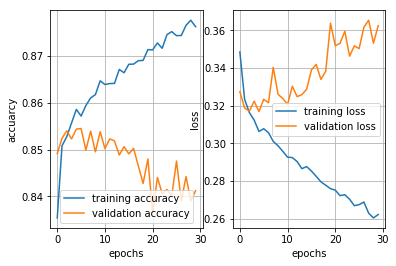

In [18]:
K.clear_session()
nin = Xtr_scale.shape[1]  # dimension of input data
nh = 100     # number of hidden units
nout = int(2)    # number of outputs = 10 since there are 10 classes
model = Sequential()
model.add(Dense(nh, input_shape=(nin,), activation='sigmoid', name='hidden'))
model.add(Dense(nout, activation='softmax', name='output'))
print (model.summary())
from keras import optimizers
opt = optimizers.Adam(lr=0.02 ,beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
hist = model.fit(Xtr_scale, y_train, epochs=30, batch_size=100, validation_data=(Xts_scale,y_test))
tr_accuracy = hist.history['acc']
val_accuracy = hist.history['val_acc']
loss = hist.history['loss']
val_loss =  hist.history['val_loss']

plt.subplot(1,2,1)
plt.plot(tr_accuracy)
plt.plot(val_accuracy)
plt.grid()
plt.xlabel('epochs')
plt.ylabel('accuarcy')
plt.legend(['training accuracy', 'validation accuracy'])

plt.subplot(1,2,2)
plt.plot(loss)
plt.plot(val_loss)
plt.grid()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['training loss', 'validation loss'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               7900      
_________________________________________________________________
output (Dense)               (None, 2)                 202       
Total params: 8,102
Trainable params: 8,102
Non-trainable params: 0
_________________________________________________________________
None
Train on 32560 samples, validate on 16281 samples
Epoch 1/5
32560/32560 [==============================] - 1s 24us/step - loss: 0.9856 - acc: 0.2446 - val_loss: 0.9890 - val_acc: 0.2392
Epoch 2/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.9856 - acc: 0.2446 - val_loss: 0.9890 - val_acc: 0.2392
Epoch 3/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.9856 - acc: 0.2446 - val_loss: 0.9890 - val_acc: 0.2392
Epoch 4/5
32560/32560 [==============================] - 1s 16us/step - l

Train on 32560 samples, validate on 16281 samples
Epoch 1/5
32560/32560 [==============================] - 1s 21us/step - loss: 0.5342 - acc: 0.7582 - val_loss: 0.5306 - val_acc: 0.7621
Epoch 2/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.5342 - acc: 0.7582 - val_loss: 0.5306 - val_acc: 0.7621
Epoch 3/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.5342 - acc: 0.7582 - val_loss: 0.5306 - val_acc: 0.7621
Epoch 4/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.5342 - acc: 0.7582 - val_loss: 0.5306 - val_acc: 0.7621
Epoch 5/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.5342 - acc: 0.7582 - val_loss: 0.5306 - val_acc: 0.7621
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               7900      
_________________________________________________________________
output

32560/32560 [==============================] - 1s 16us/step - loss: 0.3262 - acc: 0.8482 - val_loss: 0.3398 - val_acc: 0.8367
Epoch 3/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.3185 - acc: 0.8519 - val_loss: 0.3178 - val_acc: 0.8517
Epoch 4/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.3113 - acc: 0.8564 - val_loss: 0.3186 - val_acc: 0.8523
Epoch 5/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.3070 - acc: 0.8573 - val_loss: 0.3356 - val_acc: 0.8532
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               7900      
_________________________________________________________________
output (Dense)               (None, 2)                 202       
Total params: 8,102
Trainable params: 8,102
Non-trainable params: 0
_________________________________________________________________
No

32560/32560 [==============================] - 1s 16us/step - loss: 0.3191 - acc: 0.8521 - val_loss: 0.3169 - val_acc: 0.8542
Epoch 4/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.3129 - acc: 0.8547 - val_loss: 0.3244 - val_acc: 0.8487
Epoch 5/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.3080 - acc: 0.8577 - val_loss: 0.3181 - val_acc: 0.8547
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               7900      
_________________________________________________________________
output (Dense)               (None, 2)                 202       
Total params: 8,102
Trainable params: 8,102
Non-trainable params: 0
_________________________________________________________________
None
Train on 32560 samples, validate on 16281 samples
Epoch 1/5
32560/32560 [==============================] - 1s 20us/step - loss: 0.343

32560/32560 [==============================] - 1s 16us/step - loss: 0.3131 - acc: 0.8557 - val_loss: 0.3209 - val_acc: 0.8520
Epoch 5/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.3077 - acc: 0.8576 - val_loss: 0.3205 - val_acc: 0.8519
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               7900      
_________________________________________________________________
output (Dense)               (None, 2)                 202       
Total params: 8,102
Trainable params: 8,102
Non-trainable params: 0
_________________________________________________________________
None
Train on 32560 samples, validate on 16281 samples
Epoch 1/5
32560/32560 [==============================] - 1s 20us/step - loss: 0.3477 - acc: 0.8370 - val_loss: 0.3278 - val_acc: 0.8509
Epoch 2/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.324

32560/32560 [==============================] - 1s 17us/step - loss: 0.3210 - acc: 0.8538 - val_loss: 0.3284 - val_acc: 0.8515
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               7900      
_________________________________________________________________
output (Dense)               (None, 2)                 202       
Total params: 8,102
Trainable params: 8,102
Non-trainable params: 0
_________________________________________________________________
None
Train on 32560 samples, validate on 16281 samples
Epoch 1/5
32560/32560 [==============================] - 1s 21us/step - loss: 0.3602 - acc: 0.8341 - val_loss: 0.3565 - val_acc: 0.8399
Epoch 2/5
32560/32560 [==============================] - 1s 17us/step - loss: 0.3339 - acc: 0.8468 - val_loss: 0.3296 - val_acc: 0.8530
Epoch 3/5
32560/32560 [==============================] - 1s 17us/step - loss: 0.324

output (Dense)               (None, 2)                 202       
Total params: 8,102
Trainable params: 8,102
Non-trainable params: 0
_________________________________________________________________
None
Train on 32560 samples, validate on 16281 samples
Epoch 1/5
32560/32560 [==============================] - 1s 20us/step - loss: 0.3512 - acc: 0.8368 - val_loss: 0.3318 - val_acc: 0.8495
Epoch 2/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.3265 - acc: 0.8498 - val_loss: 0.4267 - val_acc: 0.7952
Epoch 3/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.3217 - acc: 0.8505 - val_loss: 0.3344 - val_acc: 0.8450
Epoch 4/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.3197 - acc: 0.8536 - val_loss: 0.3250 - val_acc: 0.8488
Epoch 5/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.3113 - acc: 0.8555 - val_loss: 0.3206 - val_acc: 0.8536
_________________________________________________________________

Train on 32560 samples, validate on 16281 samples
Epoch 1/5
32560/32560 [==============================] - 1s 20us/step - loss: 0.3575 - acc: 0.8377 - val_loss: 0.3342 - val_acc: 0.8468
Epoch 2/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.3371 - acc: 0.8465 - val_loss: 0.3205 - val_acc: 0.8519
Epoch 3/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.3293 - acc: 0.8516 - val_loss: 0.3553 - val_acc: 0.8501
Epoch 4/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.3291 - acc: 0.8526 - val_loss: 0.3462 - val_acc: 0.8515
Epoch 5/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.3271 - acc: 0.8518 - val_loss: 0.3572 - val_acc: 0.8289
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               7900      
_________________________________________________________________
output

32560/32560 [==============================] - 1s 16us/step - loss: 0.3299 - acc: 0.8481 - val_loss: 0.3335 - val_acc: 0.8408
Epoch 3/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.3233 - acc: 0.8507 - val_loss: 0.3597 - val_acc: 0.8532
Epoch 4/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.3220 - acc: 0.8522 - val_loss: 0.3546 - val_acc: 0.8511
Epoch 5/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.3183 - acc: 0.8549 - val_loss: 0.3329 - val_acc: 0.8480
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               7900      
_________________________________________________________________
output (Dense)               (None, 2)                 202       
Total params: 8,102
Trainable params: 8,102
Non-trainable params: 0
_________________________________________________________________
No

32560/32560 [==============================] - 1s 16us/step - loss: 0.3344 - acc: 0.8479 - val_loss: 0.3348 - val_acc: 0.8447
Epoch 4/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.3358 - acc: 0.8484 - val_loss: 0.3352 - val_acc: 0.8434
Epoch 5/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.3333 - acc: 0.8508 - val_loss: 0.3472 - val_acc: 0.8533
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               7900      
_________________________________________________________________
output (Dense)               (None, 2)                 202       
Total params: 8,102
Trainable params: 8,102
Non-trainable params: 0
_________________________________________________________________
None
Train on 32560 samples, validate on 16281 samples
Epoch 1/5
32560/32560 [==============================] - 1s 20us/step - loss: 0.360

32560/32560 [==============================] - 1s 16us/step - loss: 0.3628 - acc: 0.8452 - val_loss: 0.4460 - val_acc: 0.8458
Epoch 5/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.3665 - acc: 0.8461 - val_loss: 0.3463 - val_acc: 0.8512
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               7900      
_________________________________________________________________
output (Dense)               (None, 2)                 202       
Total params: 8,102
Trainable params: 8,102
Non-trainable params: 0
_________________________________________________________________
None
Train on 32560 samples, validate on 16281 samples
Epoch 1/5
32560/32560 [==============================] - 1s 20us/step - loss: 0.3910 - acc: 0.8306 - val_loss: 0.3605 - val_acc: 0.8521
Epoch 2/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.356

32560/32560 [==============================] - 1s 16us/step - loss: 0.3405 - acc: 0.8478 - val_loss: 0.3587 - val_acc: 0.8464
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               7900      
_________________________________________________________________
output (Dense)               (None, 2)                 202       
Total params: 8,102
Trainable params: 8,102
Non-trainable params: 0
_________________________________________________________________
None
Train on 32560 samples, validate on 16281 samples
Epoch 1/5
32560/32560 [==============================] - 1s 20us/step - loss: 0.3652 - acc: 0.8335 - val_loss: 0.3287 - val_acc: 0.8493
Epoch 2/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.3411 - acc: 0.8450 - val_loss: 0.3310 - val_acc: 0.8460
Epoch 3/5
32560/32560 [==============================] - 1s 17us/step - loss: 0.333

Trainable params: 8,102
Non-trainable params: 0
_________________________________________________________________
None
Train on 32560 samples, validate on 16281 samples
Epoch 1/5
32560/32560 [==============================] - 1s 20us/step - loss: 0.3890 - acc: 0.8288 - val_loss: 0.3578 - val_acc: 0.8430
Epoch 2/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.3671 - acc: 0.8388 - val_loss: 0.3876 - val_acc: 0.8482
Epoch 3/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.3578 - acc: 0.8435 - val_loss: 0.3428 - val_acc: 0.8370
Epoch 4/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.3858 - acc: 0.8413 - val_loss: 0.3825 - val_acc: 0.8394
Epoch 5/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.3814 - acc: 0.8435 - val_loss: 0.3445 - val_acc: 0.8452
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)     

32560/32560 [==============================] - 1s 21us/step - loss: 0.4456 - acc: 0.8243 - val_loss: 0.3529 - val_acc: 0.8436
Epoch 2/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.3942 - acc: 0.8417 - val_loss: 0.3616 - val_acc: 0.8464
Epoch 3/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.4084 - acc: 0.8409 - val_loss: 0.3852 - val_acc: 0.8499
Epoch 4/5
32560/32560 [==============================] - 1s 18us/step - loss: 0.4142 - acc: 0.8388 - val_loss: 1.2014 - val_acc: 0.7587
Epoch 5/5
32560/32560 [==============================] - 1s 18us/step - loss: 0.3987 - acc: 0.8410 - val_loss: 0.3981 - val_acc: 0.8441
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               7900      
_________________________________________________________________
output (Dense)               (None, 2)                 202       


32560/32560 [==============================] - 1s 16us/step - loss: 0.3684 - acc: 0.8376 - val_loss: 0.4951 - val_acc: 0.7845
Epoch 3/5
32560/32560 [==============================] - 1s 17us/step - loss: 0.3620 - acc: 0.8419 - val_loss: 0.3485 - val_acc: 0.8434
Epoch 4/5
32560/32560 [==============================] - 1s 17us/step - loss: 0.3722 - acc: 0.8432 - val_loss: 0.3648 - val_acc: 0.8354
Epoch 5/5
32560/32560 [==============================] - 1s 17us/step - loss: 0.3612 - acc: 0.8432 - val_loss: 0.3442 - val_acc: 0.8445
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               7900      
_________________________________________________________________
output (Dense)               (None, 2)                 202       
Total params: 8,102
Trainable params: 8,102
Non-trainable params: 0
_________________________________________________________________
No

32560/32560 [==============================] - 1s 17us/step - loss: 0.4347 - acc: 0.8375 - val_loss: 0.5503 - val_acc: 0.8423
Epoch 4/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.4355 - acc: 0.8392 - val_loss: 0.8271 - val_acc: 0.7777
Epoch 5/5
32560/32560 [==============================] - 1s 17us/step - loss: 0.4458 - acc: 0.8375 - val_loss: 0.4700 - val_acc: 0.8426
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               7900      
_________________________________________________________________
output (Dense)               (None, 2)                 202       
Total params: 8,102
Trainable params: 8,102
Non-trainable params: 0
_________________________________________________________________
None
Train on 32560 samples, validate on 16281 samples
Epoch 1/5
32560/32560 [==============================] - 1s 21us/step - loss: 0.455

32560/32560 [==============================] - 1s 17us/step - loss: 0.3584 - acc: 0.8414 - val_loss: 0.3785 - val_acc: 0.8434
Epoch 5/5
32560/32560 [==============================] - 1s 17us/step - loss: 0.3758 - acc: 0.8391 - val_loss: 0.3494 - val_acc: 0.8474
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               7900      
_________________________________________________________________
output (Dense)               (None, 2)                 202       
Total params: 8,102
Trainable params: 8,102
Non-trainable params: 0
_________________________________________________________________
None
Train on 32560 samples, validate on 16281 samples
Epoch 1/5
32560/32560 [==============================] - 1s 21us/step - loss: 0.3986 - acc: 0.8262 - val_loss: 0.3510 - val_acc: 0.8428
Epoch 2/5
32560/32560 [==============================] - 1s 18us/step - loss: 0.362

Text(0,0.5,'accuarcy')

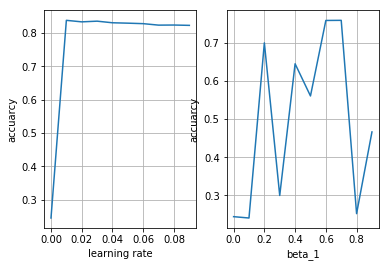

In [20]:

##hyper parameters

acc =np.zeros((10,10))
for i in range (10):
    for j in range (10):
        K.clear_session()
        nin = Xtr_scale.shape[1]  # dimension of input data
        nh = 100     # number of hidden units
        nout = int(2)    # number of outputs = 10 since there are 10 classes
        model = Sequential()
        model.add(Dense(nh, input_shape=(nin,), activation='sigmoid', name='hidden'))
        model.add(Dense(nout, activation='softmax', name='output'))
        print (model.summary())
        from keras import optimizers
        opt = optimizers.Adam(lr=0.01*i ,beta_1=0.1*j, beta_2=0.999, epsilon=1e-08, decay=0.0)
        model.compile(optimizer=opt,
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
        hist = model.fit(Xtr_scale, y_train, epochs=5, batch_size=100, validation_data=(Xts_scale,y_test))
        acc[i][j]= hist.history['acc'][0]

plt.subplot(1,2,1)
plt.plot(np.arange(10)*0.01,acc [:,0])
plt.grid()
plt.xlabel('learning rate')
plt.ylabel('accuarcy')

plt.subplot(1,2,2)
plt.plot(np.arange(10)*0.1,acc [0,:])
plt.plot()
plt.grid()
plt.xlabel('beta_1')
plt.ylabel('accuarcy')


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               7900      
_________________________________________________________________
output (Dense)               (None, 2)                 202       
Total params: 8,102
Trainable params: 8,102
Non-trainable params: 0
_________________________________________________________________
None
Train on 32560 samples, validate on 16281 samples
Epoch 1/5
32560/32560 [==============================] - 1s 21us/step - loss: nan - acc: 0.7566 - val_loss: nan - val_acc: 0.7638
Epoch 2/5
32560/32560 [==============================] - 1s 17us/step - loss: nan - acc: 0.7592 - val_loss: nan - val_acc: 0.7638
Epoch 3/5
32560/32560 [==============================] - 1s 16us/step - loss: nan - acc: 0.7592 - val_loss: nan - val_acc: 0.7638
Epoch 4/5
32560/32560 [==============================] - 1s 16us/step - loss: nan - acc: 0.

Train on 32560 samples, validate on 16281 samples
Epoch 1/5
32560/32560 [==============================] - 1s 22us/step - loss: 0.3719 - acc: 0.8256 - val_loss: 0.3316 - val_acc: 0.8472
Epoch 2/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.3307 - acc: 0.8451 - val_loss: 0.3260 - val_acc: 0.8496
Epoch 3/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.3258 - acc: 0.8479 - val_loss: 0.3331 - val_acc: 0.8461
Epoch 4/5
32560/32560 [==============================] - 1s 18us/step - loss: 0.3237 - acc: 0.8494 - val_loss: 0.3343 - val_acc: 0.8460
Epoch 5/5
32560/32560 [==============================] - 1s 17us/step - loss: 0.3224 - acc: 0.8488 - val_loss: 0.3289 - val_acc: 0.8477
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               7900      
_________________________________________________________________
output

32560/32560 [==============================] - 1s 16us/step - loss: 0.3279 - acc: 0.8490 - val_loss: 0.3248 - val_acc: 0.8494
Epoch 3/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.3265 - acc: 0.8487 - val_loss: 0.3223 - val_acc: 0.8517
Epoch 4/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.3258 - acc: 0.8478 - val_loss: 0.3209 - val_acc: 0.8509
Epoch 5/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.3232 - acc: 0.8501 - val_loss: 0.3306 - val_acc: 0.8469
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               7900      
_________________________________________________________________
output (Dense)               (None, 2)                 202       
Total params: 8,102
Trainable params: 8,102
Non-trainable params: 0
_________________________________________________________________
No

32560/32560 [==============================] - 1s 17us/step - loss: 0.3268 - acc: 0.8489 - val_loss: 0.3243 - val_acc: 0.8496
Epoch 4/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.3241 - acc: 0.8491 - val_loss: 0.3225 - val_acc: 0.8505
Epoch 5/5
32560/32560 [==============================] - 1s 17us/step - loss: 0.3225 - acc: 0.8505 - val_loss: 0.3264 - val_acc: 0.8498
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               7900      
_________________________________________________________________
output (Dense)               (None, 2)                 202       
Total params: 8,102
Trainable params: 8,102
Non-trainable params: 0
_________________________________________________________________
None
Train on 32560 samples, validate on 16281 samples
Epoch 1/5
32560/32560 [==============================] - 1s 22us/step - loss: 0.387

32560/32560 [==============================] - 1s 16us/step - loss: 0.3238 - acc: 0.8488 - val_loss: 0.3221 - val_acc: 0.8509
Epoch 5/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.3236 - acc: 0.8476 - val_loss: 0.3213 - val_acc: 0.8526
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               7900      
_________________________________________________________________
output (Dense)               (None, 2)                 202       
Total params: 8,102
Trainable params: 8,102
Non-trainable params: 0
_________________________________________________________________
None
Train on 32560 samples, validate on 16281 samples
Epoch 1/5
32560/32560 [==============================] - 1s 20us/step - loss: 0.3656 - acc: 0.8278 - val_loss: 0.3395 - val_acc: 0.8411
Epoch 2/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.329

32560/32560 [==============================] - 1s 16us/step - loss: 0.3235 - acc: 0.8530 - val_loss: 0.3301 - val_acc: 0.8530
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               7900      
_________________________________________________________________
output (Dense)               (None, 2)                 202       
Total params: 8,102
Trainable params: 8,102
Non-trainable params: 0
_________________________________________________________________
None
Train on 32560 samples, validate on 16281 samples
Epoch 1/5
32560/32560 [==============================] - 1s 21us/step - loss: 0.3491 - acc: 0.8342 - val_loss: 0.3319 - val_acc: 0.8460
Epoch 2/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.3308 - acc: 0.8452 - val_loss: 0.3245 - val_acc: 0.8503
Epoch 3/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.327

Non-trainable params: 0
_________________________________________________________________
None
Train on 32560 samples, validate on 16281 samples
Epoch 1/5
32560/32560 [==============================] - 1s 20us/step - loss: 0.3720 - acc: 0.8256 - val_loss: 0.3340 - val_acc: 0.8455
Epoch 2/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.3308 - acc: 0.8452 - val_loss: 0.3265 - val_acc: 0.8488
Epoch 3/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.3260 - acc: 0.8489 - val_loss: 0.3256 - val_acc: 0.8495
Epoch 4/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.3240 - acc: 0.8487 - val_loss: 0.3320 - val_acc: 0.8454
Epoch 5/5
32560/32560 [==============================] - 1s 17us/step - loss: 0.3223 - acc: 0.8502 - val_loss: 0.3236 - val_acc: 0.8496
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)   

32560/32560 [==============================] - 1s 20us/step - loss: 0.3571 - acc: 0.8331 - val_loss: 0.3279 - val_acc: 0.8474
Epoch 2/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.3284 - acc: 0.8466 - val_loss: 0.3226 - val_acc: 0.8522
Epoch 3/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.3259 - acc: 0.8479 - val_loss: 0.3229 - val_acc: 0.8509
Epoch 4/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.3245 - acc: 0.8478 - val_loss: 0.3218 - val_acc: 0.8517
Epoch 5/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.3235 - acc: 0.8490 - val_loss: 0.3343 - val_acc: 0.8466
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               7900      
_________________________________________________________________
output (Dense)               (None, 2)                 202       


32560/32560 [==============================] - 1s 16us/step - loss: 0.3337 - acc: 0.8444 - val_loss: 0.3311 - val_acc: 0.8461
Epoch 3/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.3281 - acc: 0.8466 - val_loss: 0.3258 - val_acc: 0.8499
Epoch 4/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.3248 - acc: 0.8481 - val_loss: 0.3234 - val_acc: 0.8505
Epoch 5/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.3230 - acc: 0.8497 - val_loss: 0.3225 - val_acc: 0.8503
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               7900      
_________________________________________________________________
output (Dense)               (None, 2)                 202       
Total params: 8,102
Trainable params: 8,102
Non-trainable params: 0
_________________________________________________________________
No

32560/32560 [==============================] - 1s 16us/step - loss: 0.3256 - acc: 0.8479 - val_loss: 0.3245 - val_acc: 0.8504
Epoch 4/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.3239 - acc: 0.8492 - val_loss: 0.3268 - val_acc: 0.8491
Epoch 5/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.3228 - acc: 0.8488 - val_loss: 0.3350 - val_acc: 0.8444
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               7900      
_________________________________________________________________
output (Dense)               (None, 2)                 202       
Total params: 8,102
Trainable params: 8,102
Non-trainable params: 0
_________________________________________________________________
None
Train on 32560 samples, validate on 16281 samples
Epoch 1/5
32560/32560 [==============================] - 1s 20us/step - loss: 0.372

32560/32560 [==============================] - 1s 15us/step - loss: 0.3250 - acc: 0.8490 - val_loss: 0.3589 - val_acc: 0.8274
Epoch 5/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.3232 - acc: 0.8505 - val_loss: 0.3662 - val_acc: 0.8340
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               7900      
_________________________________________________________________
output (Dense)               (None, 2)                 202       
Total params: 8,102
Trainable params: 8,102
Non-trainable params: 0
_________________________________________________________________
None
Train on 32560 samples, validate on 16281 samples
Epoch 1/5
32560/32560 [==============================] - 1s 21us/step - loss: 0.3541 - acc: 0.8338 - val_loss: 0.3328 - val_acc: 0.8451
Epoch 2/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.329

32560/32560 [==============================] - 1s 16us/step - loss: 0.3227 - acc: 0.8500 - val_loss: 0.3222 - val_acc: 0.8517
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               7900      
_________________________________________________________________
output (Dense)               (None, 2)                 202       
Total params: 8,102
Trainable params: 8,102
Non-trainable params: 0
_________________________________________________________________
None
Train on 32560 samples, validate on 16281 samples
Epoch 1/5
32560/32560 [==============================] - 1s 22us/step - loss: 0.3870 - acc: 0.8164 - val_loss: 0.3364 - val_acc: 0.8460
Epoch 2/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.3330 - acc: 0.8442 - val_loss: 0.3297 - val_acc: 0.8481
Epoch 3/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.327

Train on 32560 samples, validate on 16281 samples
Epoch 1/5
32560/32560 [==============================] - 1s 22us/step - loss: 0.3618 - acc: 0.8292 - val_loss: 0.3311 - val_acc: 0.8475
Epoch 2/5
32560/32560 [==============================] - 1s 17us/step - loss: 0.3292 - acc: 0.8468 - val_loss: 0.3278 - val_acc: 0.8472
Epoch 3/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.3262 - acc: 0.8469 - val_loss: 0.3222 - val_acc: 0.8522
Epoch 4/5
32560/32560 [==============================] - 1s 17us/step - loss: 0.3234 - acc: 0.8490 - val_loss: 0.3302 - val_acc: 0.8485
Epoch 5/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.3229 - acc: 0.8501 - val_loss: 0.3316 - val_acc: 0.8461
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               7900      
_________________________________________________________________
output

32560/32560 [==============================] - 1s 17us/step - loss: 0.3293 - acc: 0.8479 - val_loss: 0.3253 - val_acc: 0.8518
Epoch 3/5
32560/32560 [==============================] - 1s 17us/step - loss: 0.3199 - acc: 0.8531 - val_loss: 0.3171 - val_acc: 0.8524
Epoch 4/5
32560/32560 [==============================] - 1s 17us/step - loss: 0.3165 - acc: 0.8537 - val_loss: 0.3221 - val_acc: 0.8494
Epoch 5/5
32560/32560 [==============================] - 1s 17us/step - loss: 0.3136 - acc: 0.8557 - val_loss: 0.3255 - val_acc: 0.8529
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               7900      
_________________________________________________________________
output (Dense)               (None, 2)                 202       
Total params: 8,102
Trainable params: 8,102
Non-trainable params: 0
_________________________________________________________________
No

32560/32560 [==============================] - 1s 17us/step - loss: 0.3261 - acc: 0.8480 - val_loss: 0.3244 - val_acc: 0.8493
Epoch 4/5
32560/32560 [==============================] - 1s 17us/step - loss: 0.3236 - acc: 0.8489 - val_loss: 0.3259 - val_acc: 0.8484
Epoch 5/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.3221 - acc: 0.8504 - val_loss: 0.3288 - val_acc: 0.8476
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               7900      
_________________________________________________________________
output (Dense)               (None, 2)                 202       
Total params: 8,102
Trainable params: 8,102
Non-trainable params: 0
_________________________________________________________________
None
Train on 32560 samples, validate on 16281 samples
Epoch 1/5
32560/32560 [==============================] - 1s 21us/step - loss: 0.381

32560/32560 [==============================] - 1s 16us/step - loss: 0.3247 - acc: 0.8486 - val_loss: 0.3202 - val_acc: 0.8534
Epoch 5/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.3234 - acc: 0.8482 - val_loss: 0.3282 - val_acc: 0.8448
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               7900      
_________________________________________________________________
output (Dense)               (None, 2)                 202       
Total params: 8,102
Trainable params: 8,102
Non-trainable params: 0
_________________________________________________________________
None
Train on 32560 samples, validate on 16281 samples
Epoch 1/5
32560/32560 [==============================] - 1s 20us/step - loss: 0.3593 - acc: 0.8324 - val_loss: 0.3351 - val_acc: 0.8453
Epoch 2/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.329

32560/32560 [==============================] - 1s 16us/step - loss: 0.3230 - acc: 0.8510 - val_loss: 0.3226 - val_acc: 0.8520
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               7900      
_________________________________________________________________
output (Dense)               (None, 2)                 202       
Total params: 8,102
Trainable params: 8,102
Non-trainable params: 0
_________________________________________________________________
None
Train on 32560 samples, validate on 16281 samples
Epoch 1/5
32560/32560 [==============================] - 1s 20us/step - loss: 0.3900 - acc: 0.8186 - val_loss: 0.3462 - val_acc: 0.8398
Epoch 2/5
32560/32560 [==============================] - 1s 17us/step - loss: 0.3341 - acc: 0.8435 - val_loss: 0.3287 - val_acc: 0.8488
Epoch 3/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.327

Text(0,0.5,'accuarcy')

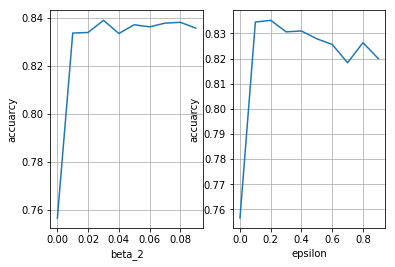

In [21]:

acc =np.zeros((10,10))
for i in range (10):
    for j in range (10):
        K.clear_session()
        nin = Xtr_scale.shape[1]  # dimension of input data
        nh = 100     # number of hidden units
        nout = int(2)    # number of outputs = 10 since there are 10 classes
        model = Sequential()
        model.add(Dense(nh, input_shape=(nin,), activation='sigmoid', name='hidden'))
        model.add(Dense(nout, activation='softmax', name='output'))
        print (model.summary())
        from keras import optimizers
        opt = optimizers.Adam(lr=0.01 ,beta_1=0.1, beta_2=0.1*i, epsilon=0.01*j, decay=0.0)
        model.compile(optimizer=opt,
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
        hist = model.fit(Xtr_scale, y_train, epochs=5, batch_size=100, validation_data=(Xts_scale,y_test))
        acc[i][j]= hist.history['acc'][0]

plt.subplot(1,2,1)
plt.plot(np.arange(10)*0.01,acc [:,0])
plt.grid()
plt.xlabel('beta_2')
plt.ylabel('accuarcy')

plt.subplot(1,2,2)
plt.plot(np.arange(10)*0.1,acc [0,:])
plt.plot()
plt.grid()
plt.xlabel('epsilon')
plt.ylabel('accuarcy')

